In [1]:
import numpy
import cv2 
import pandas as pd
import matplotlib.pyplot as plt

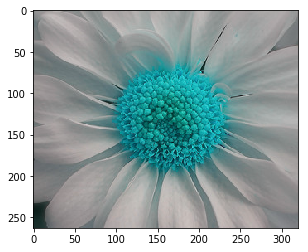

In [2]:
img = cv2.imread('data/flowers/daisy/100080576_f52e8ee070_n.jpg')
plt.imshow(img)
plt.show()

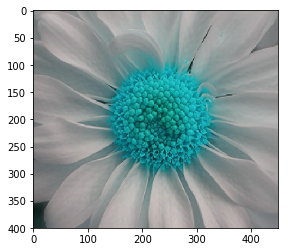

In [3]:
img_x = 450
img_y = 400
plt.imshow(cv2.resize(img, (img_x,img_y)))
plt.show()

In [4]:
import glob
datalist = []
labellist = []
for image_path in glob.glob("data/flowers/tulip/*.jpg"):
    img = cv2.imread(image_path)
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(0)
    datalist.append(X)
for image_path in glob.glob("data/flowers/sunflower/*.jpg"):
    img = cv2.imread(image_path)
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(1)
    datalist.append(X)
for image_path in glob.glob("data/flowers/rose/*.jpg"):
    img = cv2.imread(image_path)
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(2)
    datalist.append(X)
for image_path in glob.glob("data/flowers/dandelion/*.jpg"):
    img = cv2.imread(image_path)
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(3)
    datalist.append(X)
for image_path in glob.glob("data/flowers/daisy/*.jpg"):
    img = cv2.imread(image_path)
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(4)
    datalist.append(X)

In [5]:
datalist = numpy.array(datalist)
labellist = numpy.array(labellist)
datalist.shape

(3452, 400, 450, 3)

In [6]:
n_labels = numpy.max(labellist) + 1
labellist = numpy.eye(n_labels)[labellist]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datalist, labellist, test_size = 0.15, shuffle=True)

In [8]:
import keras

Using TensorFlow backend.


In [9]:
cnn = keras.Sequential()
cnn.add(keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1,1), activation='relu', input_shape=(img_y,img_x,3)))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.Dropout(rate=0.01))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(100, activation="relu"))
cnn.add(keras.layers.Dense(5, activation='softmax'))
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.02),
              metrics=['accuracy'])

In [10]:
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
2240/2934 [=====================>........] - ETA: 4:54 - loss: 12.2099 - acc: 0.2402

KeyboardInterrupt: 